Loan Approval Rate (Male): 0.18917299240910906
Loan Approval Rate (Female): 0.4293151782138566
Demographic Parity Difference: -0.24014218580474755
Disparate Impact Ratio: 2.269431660125202


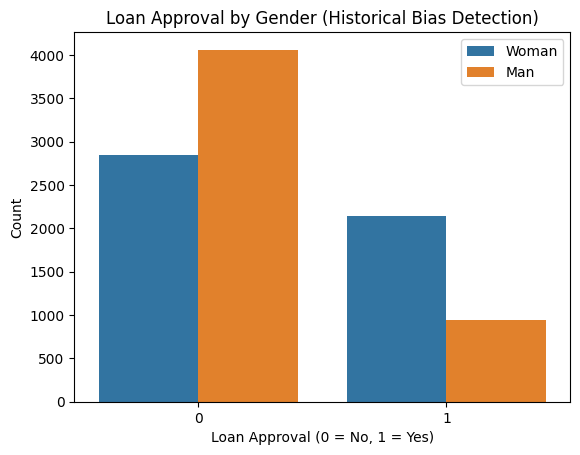

Contingency Table:
 bank_loan     0     1
sex                  
0          2850  2144
1          4059   947

Chi-square Value: 673.9666490099169
p-value: 1.37082027666878e-148

Conclusion: Loan approval DEPENDS on gender → Historical bias exists.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("biased_gender_loans.csv")

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['bank_loan'] = LabelEncoder().fit_transform(df['bank_loan'])

sens = df['sex']
y = df['bank_loan']

loan_rate_male = y[sens == 1].mean()
loan_rate_female = y[sens == 0].mean()

demographic_parity_difference = loan_rate_male - loan_rate_female
disparate_impact_ratio = loan_rate_female / loan_rate_male

print("Loan Approval Rate (Male):", loan_rate_male)
print("Loan Approval Rate (Female):", loan_rate_female)
print("Demographic Parity Difference:", demographic_parity_difference)
print("Disparate Impact Ratio:", disparate_impact_ratio)

sns.countplot(x='bank_loan', hue='sex', data=df)
plt.title("Loan Approval by Gender (Historical Bias Detection)")
plt.xlabel("Loan Approval (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["Woman", "Man"])
plt.show()

import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("biased_gender_loans.csv")
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['bank_loan'] = LabelEncoder().fit_transform(df['bank_loan'])
contingency = pd.crosstab(df['sex'], df['bank_loan'])
print("Contingency Table:\n", contingency)
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square Value:", chi2)
print("p-value:", p)
if p < 0.05:
    print("\nConclusion: Loan approval DEPENDS on gender → Historical bias exists.")
else:
    print("\nConclusion: No statistical evidence of gender bias.")
